In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

In [ ]:
lsu = u.def_unit('ls', const.c * u.second)
grav_unit = lsu*lsu*lsu / (u.M_sun * u.day * u.day)
grav = const.G.to(grav_unit)
print(grav)

36768.70624421921
36768.592904504156 ls3 / (solMass d2)


In [174]:
def elipse(t,y,m1,m2,G):
    x1,y1,x2,y2,vx1,vy1,vx2,vy2 = y

    return [
        vx1, #x1-dot = vx1
        vy1, #y1-dot = vy1
        vx2, #x2-dot = vx2
        vy2, #y2-dot = vy2
        -G*(m1+m2)*x1 / np.power(np.power(x1+x2,2) + np.power(y1+y2,2),3/2), #x1-doubled-dot =
        -G*(m1+m2)*y1 / np.power(np.power(x1+x2,2) + np.power(y1+y2,2),3/2), #y1-double-dot =
        -G*(m1+m2)*x2 / np.power(np.power(x1+x2,2) + np.power(y1+y2,2),3/2),  #x2-double-dot =
        -G*(m1+m2)*y2 / np.power(np.power(x1+x2,2) + np.power(y1+y2,2),3/2)   #y2-double-dot =
    ]

#Calculate initial conditons
initial_distnace = 30 #light seconds
m1 = 1.0 #solar masses
m2 = 2.0 #solar masses
r1_0 = m2 / (m1+m2) * initial_distnace
r2_0 = m1 / (m1+m2) * initial_distnace
v2_0 = 148
v1_0 = v2_0*r1_0/r2_0

y0=[
    r1_0, #x1
    0, #y1
    -r2_0, #x2
    0, #y2
    0, #x1-dot
    v1_0, #y1-dot
    0, #x2-dot
    -v2_0 #y2-dot
    ]

pure_ellipse_forces = solve_ivp(elipse,[0,20],y0,method='RK45',max_step=0.001,args=(m1,m2,grav))



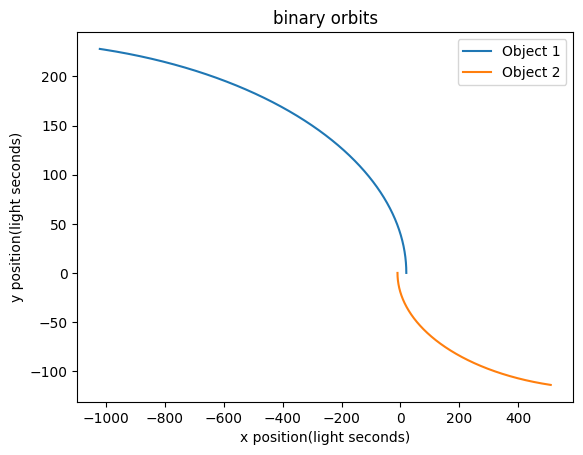

In [175]:
t_vals = pure_ellipse_forces.t
x1 = pure_ellipse_forces.y[0]
y1 = pure_ellipse_forces.y[1]
x2 = pure_ellipse_forces.y[2]
y2 = pure_ellipse_forces.y[3]
x1_dot = pure_ellipse_forces.y[4]
y1_dot = pure_ellipse_forces.y[5]
x2_dot = pure_ellipse_forces.y[6]
y2_dot = pure_ellipse_forces.y[7]

plt.title("binary orbits")
plt.xlabel("x position(light seconds)")
plt.ylabel("y position(light seconds)")
plt.plot(x1,y1, label = 'Object 1')
plt.plot(x2,y2, label = 'Object 2')
plt.legend()


Lets go ahead and plot the r vector ellipse which would be obtained from the vector pointing from mass 1 to mass 2

0.918408893984397
15.637959193200029
1.2759183864000576


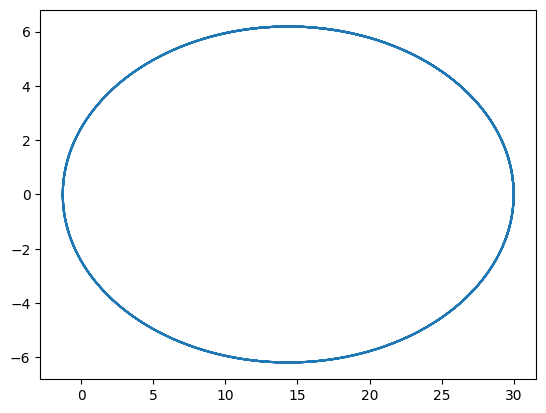

In [132]:
x_full = x1-x2
y_full = y1-y2
plt.plot(x_full,y_full)
semi_major_axis = (max(x_full)-min(x_full)) / 2
extra = abs(min(x_full))
c = semi_major_axis - extra
eccentricity = c/semi_major_axis
semi_minor_axis = (max(y_full)-min(y_full)) / 2
print(eccentricity)
print(semi_major_axis)
print(semi_major_axis-c)

In [143]:
initial_distnace = 30 #light seconds
m1 = 1.0 #solar masses
m2 = 2.0 #solar masses
r1_0 = m2 / (m1+m2) * initial_distnace
r2_0 = m1 / (m1+m2) * initial_distnace
v2_0 = 30
v1_0 = v2_0*r1_0/r2_0
kinetic = 0.5 *m1 * v1_0 * v1_0 + 0.5 *m2 * v2_0 * v2_0
potential = -grav*m1*m2/initial_distnace
print(kinetic)
print(potential)

2700.0
-2451.2470829479475
